In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [2]:
data = pd.read_csv("netflix1.csv")
data.head()








,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# New Section

In [3]:
data = pd.read_csv("netflix1.csv")
data.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
data.isnull().sum()


,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [5]:
data.drop_duplicates(inplace=True)


In [8]:
data['date_added'] = pd.to_datetime(data['date_added'])




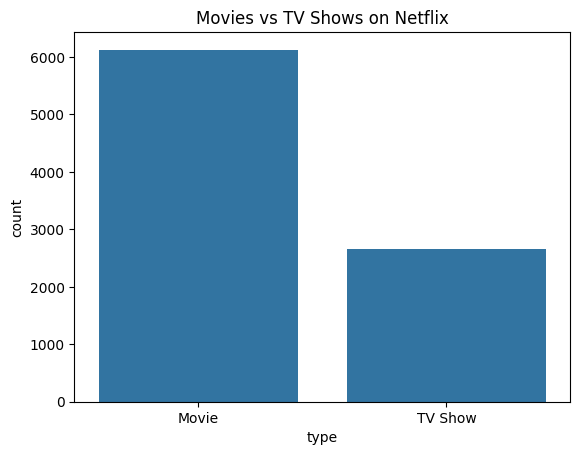

In [9]:
sns.countplot(x='type', data=data)
plt.title("Movies vs TV Shows on Netflix")
plt.show()


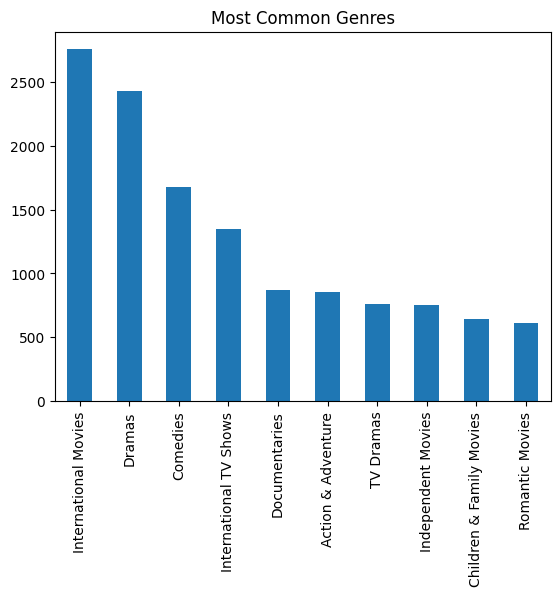

In [10]:
data['genres'] = data['listed_in'].apply(lambda x: x.split(", "))
all_genres = sum(data['genres'], [])
pd.Series(all_genres).value_counts().head(10).plot(kind='bar')
plt.title("Most Common Genres")
plt.show()


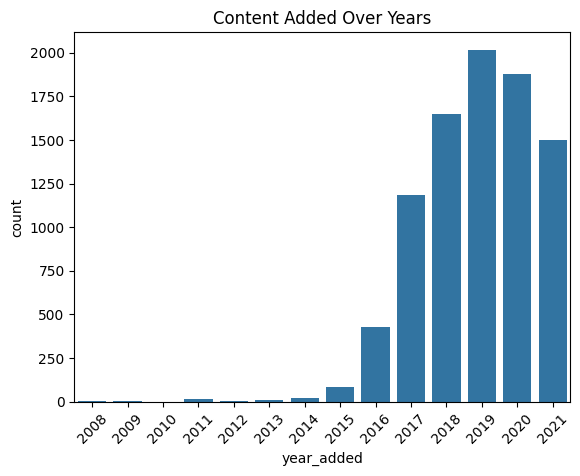

In [11]:
data['year_added'] = data['date_added'].dt.year
sns.countplot(x='year_added', data=data)
plt.xticks(rotation=45)
plt.title("Content Added Over Years")
plt.show()


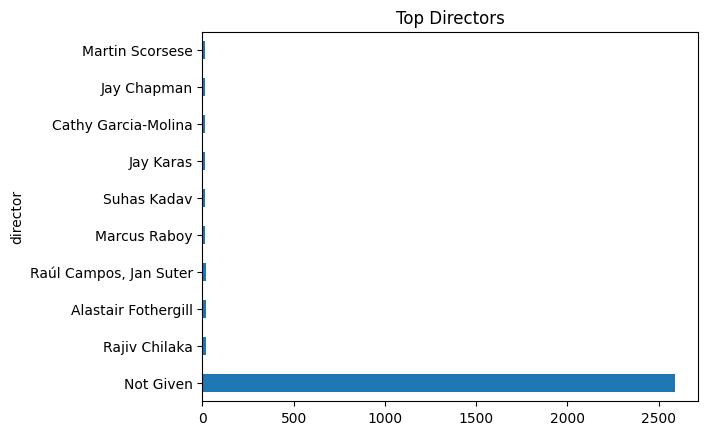

In [12]:
data['director'].value_counts().head(10).plot(kind='barh')
plt.title("Top Directors")
plt.show()


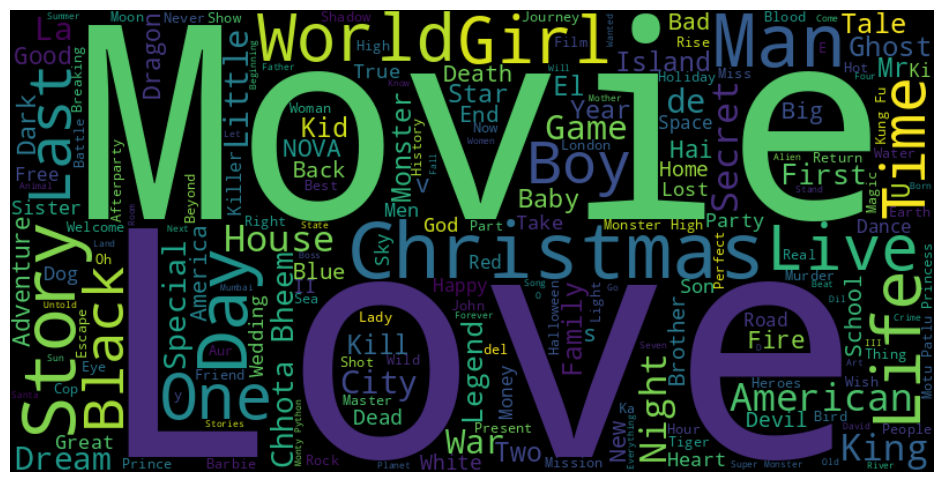

In [13]:
movie_titles = data[data['type']=='Movie']['title']
text = ' '.join(movie_titles)
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [21]:

data['duration_mins'] = data['duration'].str.extract('(\d+)')
data.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres,year_added,duration_mins
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,[Documentaries],2021,90
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV Ac...",2021,1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","[TV Dramas, TV Horror, TV Mysteries]",2021,1
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies","[Children & Family Movies, Comedies]",2021,91
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","[Dramas, Independent Movies, International Mov...",2021,125


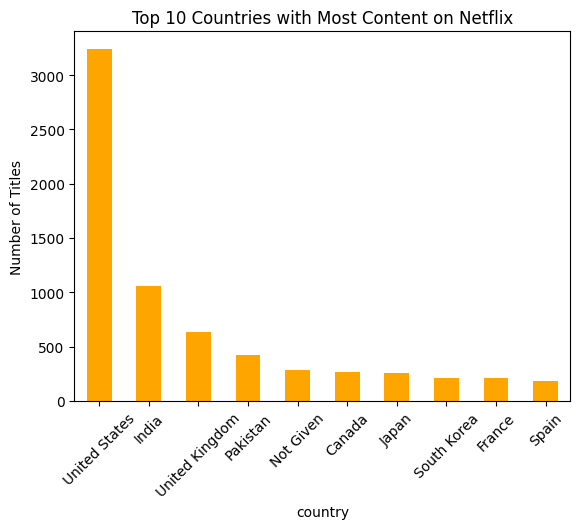

In [22]:
top_countries = data['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='orange')
plt.title("Top 10 Countries with Most Content on Netflix")
plt.xticks(rotation=45)
plt.ylabel("Number of Titles")
plt.show()


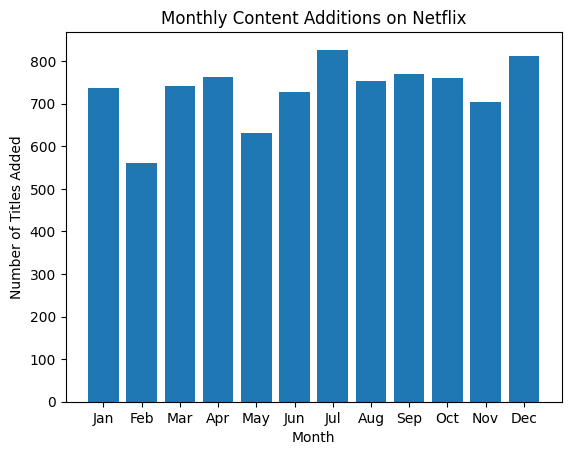

In [24]:
data['month_added'] = data['date_added'].dt.month
month_counts = data['month_added'].value_counts().sort_index()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(months, month_counts)
plt.title("Monthly Content Additions on Netflix")
plt.xlabel("Month")
plt.ylabel("Number of Titles Added")
plt.show()


In [18]:
data['duration_mins'] = data['duration'].str.extract('(\d+)').astype(float)
data.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres,year_added,duration_mins
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,[Documentaries],2021,90.0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV Ac...",2021,1.0
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","[TV Dramas, TV Horror, TV Mysteries]",2021,1.0
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies","[Children & Family Movies, Comedies]",2021,91.0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","[Dramas, Independent Movies, International Mov...",2021,125.0


In [20]:
data.to_csv("Cleaned_Netflix_Data.csv", index=False)


In [25]:
print("✅ Data cleaned, visualized, and top trends identified successfully!")


✅ Data cleaned, visualized, and top trends identified successfully!
